# Random Forest

Aplicação do random forest em uma mão de poker

***Dataset:*** https://archive.ics.uci.edu/ml/datasets/Poker+Hand

***Apresentação:*** https://docs.google.com/presentation/d/1zFS4cTf9xwvcVPiCOA-sV_RFx_UeoNX2dTthHkY9Am4/edit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils import column_or_1d
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sn
import timeit


from format import format_poker_data



In [2]:
train_data = pd.read_csv('train.csv')


In [3]:
test_data = pd.read_csv('test.csv')

In [4]:
X_train, y_train = np.split(train_data,[-1],axis=1)

In [5]:
test_data = test_data.dropna()

In [6]:
X_test, y_test = np.split(test_data,[-1],axis=1)

In [7]:
start_time = timeit.default_timer()

X_train , equal_suit_train = format_poker_data(X_train)
elapsed = timeit.default_timer() - start_time
print(str(elapsed)+" ns")

0.06867059499927564 ns


In [8]:
X_test , equal_suit_test = format_poker_data(X_test)

In [9]:
rf = RandomForestClassifier(n_estimators=50,random_state=42)
rf2 = RandomForestClassifier(n_estimators=50,random_state=42)

In [10]:
y_train = column_or_1d(y_train)
y_test = column_or_1d(y_test)

In [11]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [12]:
rf.score(X_train,y_train)

0.9974010395841664

In [13]:
rf.score(X_test,y_test)

0.983905

In [14]:
n_data_train = pd.DataFrame()
n_data_train['predict'] = rf.predict(X_train)
n_data_train['is_the_same'] = equal_suit_train
n_data_train.shape

n_data_test = pd.DataFrame()
n_data_test['predict'] = rf.predict(X_test)
n_data_test['is_the_same'] = equal_suit_test

n_data_train.head()

,predict,is_the_same
0,4,True
1,4,True
2,4,True
3,4,True
4,4,True


In [15]:
n_data_train = pd.get_dummies(n_data_train,columns=['predict']).astype('bool')
n_data_test = pd.get_dummies(n_data_test,columns=['predict']).astype('bool')

In [16]:
rf2.fit(n_data_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
rf2.score(n_data_train,y_train)

0.9997600959616153

In [18]:
rf2.score(n_data_test,y_test)

0.985913

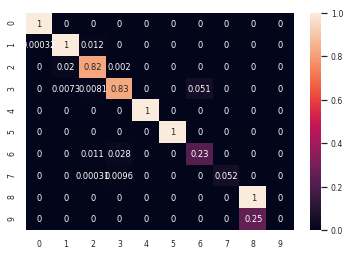

In [20]:
#Confusion Matrixfor Test Data
conf_array_test = confusion_matrix(y_test,rf2.predict(n_data_test))
conf_array_test =  conf_array_test / conf_array_test.astype(np.float).sum(axis=1)
df_class_test = pd.DataFrame(conf_array_test, range(10),range(10))
sn.set(font_scale=0.7)#for label size
sn.heatmap(df_class_test,annot=True)# font size
